In [1]:
# import libraries

import pandas as pd
import numpy as np
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df =pd.read_csv("newdataset.csv")
df


,Unnamed: 0,login_frequency_per_week,forum_posts_per_week,assignment_completion_rate,video_watch_percentage,average_quiz_score,forum_sentiment_score,dropout
0,0,11,5,0.54,62.4,73.3,0.25,1
1,1,1,8,0.79,28.4,76.6,0.41,1
2,2,12,0,0.55,56.8,65.0,0.28,1
3,3,7,5,0.61,16.7,75.1,0.14,1
4,4,1,8,0.23,64.5,31.6,0.73,0
...,...,...,...,...,...,...,...,...
995,995,7,0,0.10,67.4,80.5,0.04,0
996,996,4,0,0.55,98.7,42.9,0.29,0
997,997,1,7,0.98,79.1,53.0,0.45,1
998,998,13,1,0.56,49.1,64.1,0.12,0


In [3]:
df= df.drop(columns =['Unnamed: 0'], errors ='ignore')
df

,login_frequency_per_week,forum_posts_per_week,assignment_completion_rate,video_watch_percentage,average_quiz_score,forum_sentiment_score,dropout
0,11,5,0.54,62.4,73.3,0.25,1
1,1,8,0.79,28.4,76.6,0.41,1
2,12,0,0.55,56.8,65.0,0.28,1
3,7,5,0.61,16.7,75.1,0.14,1
4,1,8,0.23,64.5,31.6,0.73,0
...,...,...,...,...,...,...,...
995,7,0,0.10,67.4,80.5,0.04,0
996,4,0,0.55,98.7,42.9,0.29,0
997,1,7,0.98,79.1,53.0,0.45,1
998,13,1,0.56,49.1,64.1,0.12,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   login_frequency_per_week    1000 non-null   int64  
 1   forum_posts_per_week        1000 non-null   int64  
 2   assignment_completion_rate  1000 non-null   float64
 3   video_watch_percentage      1000 non-null   float64
 4   average_quiz_score          1000 non-null   float64
 5   forum_sentiment_score       1000 non-null   float64
 6   dropout                     1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


In [5]:
# prepare feature and Target
x=df.drop(columns=['dropout'])
y=df['dropout']

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [7]:
df

,login_frequency_per_week,forum_posts_per_week,assignment_completion_rate,video_watch_percentage,average_quiz_score,forum_sentiment_score
0,1.097696,0.172308,0.112568,0.278486,0.436275,-0.804318
1,-1.351425,1.225107,0.969509,-1.056538,0.600016,-0.260584
2,1.342609,-1.582357,0.146845,0.058600,0.024442,-0.702368
3,0.118048,0.172308,0.352511,-1.515943,0.525588,-1.178135
4,-1.351425,1.225107,-0.950039,0.360943,-1.632813,0.826883
...,...,...,...,...,...,...
995,0.118048,-1.582357,-1.395648,0.474813,0.793527,-1.517968
996,-0.616689,-1.582357,0.146845,1.703820,-1.072125,-0.668385
997,-1.351425,0.874174,1.620784,0.934218,-0.570979,-0.124651
998,1.587521,-1.231424,0.181123,-0.243744,-0.020215,-1.246101


In [8]:
# Train_Test_Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state =42)



In [9]:
# Check  class distribution 

print(y.value_counts())

# checking class distribution in percentage

print( "Class  Distribution (in %) :\n" ,y.value_counts(normalize= True) *100)

dropout
1    500
0    500
Name: count, dtype: int64
Class  Distribution (in %) :
 dropout
1    50.0
0    50.0
Name: proportion, dtype: float64


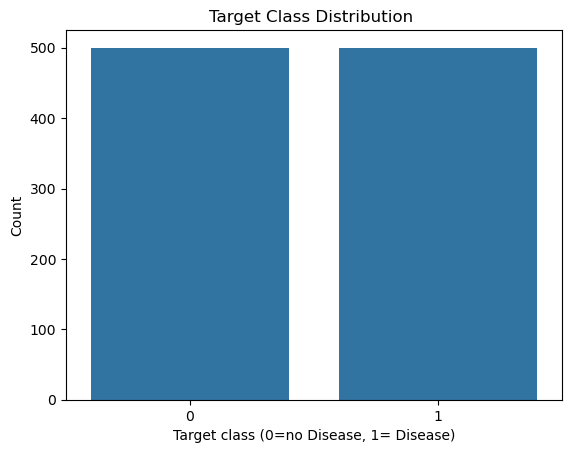

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title('Target Class Distribution ')
plt.xlabel('Target class (0=no Disease, 1= Disease)')
plt.ylabel('Count')
plt.show()

In [11]:
# Train Model 

log_model = LogisticRegression(max_iter =1000, random_state= 42)
tree_model =DecisionTreeClassifier(random_state =42)
forest_model =RandomForestClassifier(n_estimators =150 , random_state=0)

log_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
forest_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [12]:
log_acc = accuracy_score(y_test, log_model.predict(x_test))
tree_acc = accuracy_score(y_test, tree_model.predict(x_test))
forest_acc =accuracy_score(y_test, forest_model.predict(x_test))

print(f"Logistic Regression Accuracy : {log_acc *100}%")
print(f"Decision Tree Accuracy :{ tree_acc *100}%")
print(f"Random Forest Accuracy :{ forest_acc *100}%")


Logistic Regression Accuracy : 48.5%
Decision Tree Accuracy :47.5%
Random Forest Accuracy :54.0%


In [13]:
df.columns

Index(['login_frequency_per_week', 'forum_posts_per_week',
       'assignment_completion_rate', 'video_watch_percentage',
       'average_quiz_score', 'forum_sentiment_score'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   login_frequency_per_week    1000 non-null   float64
 1   forum_posts_per_week        1000 non-null   float64
 2   assignment_completion_rate  1000 non-null   float64
 3   video_watch_percentage      1000 non-null   float64
 4   average_quiz_score          1000 non-null   float64
 5   forum_sentiment_score       1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [21]:
input_data = {
    'login_frequency_per_week': float(input("Enter login_frequency_per_week: ")),
    'forum_posts_per_week': float(input("Enter forum_posts_per_week: ")),
    'assignment_completion_rate': float(input("Enter assignment_completion_rate (0 to 1): ")),
    'video_watch_percentage': float(input("Enter video_watch_percentage: ")),
    'average_quiz_score': float(input("Enter average_quiz_score: ")),
    'forum_sentiment_score': float(input("Enter forum_sentiment_score (0 = positive, 1 = negative): "))
}

# Convert input to DataFrame
user_df = pd.DataFrame([input_data])

# Scale user input (use the same scaler as used in training)
user_scaled = scaler.transform(user_df)

# Predict using trained Random Forest model
forest_pre = forest_model.predict(user_scaled)[0]

# Show prediction result
print("Random Forest Prediction:", "Dropout" if forest_pre == 1 else "Continue to study")

Enter login_frequency_per_week:  7
Enter forum_posts_per_week:  3
Enter assignment_completion_rate (0 to 1):  0.8
Enter video_watch_percentage:  85
Enter average_quiz_score:  75
Enter forum_sentiment_score (0 = positive, 1 = negative):  0.2


Random Forest Prediction: Dropout


 Model Accuracies:
Logistic Regression Accuracy: 48.50%
Decision Tree Accuracy: 47.50%
Random Forest Accuracy: 54.00%

 Confusion Matrix - Logistic Regression:
 [[50 50]
 [53 47]]

 Confusion Matrix - Decision Tree:
 [[47 53]
 [52 48]]

 Confusion Matrix - Random Forest:
 [[56 44]
 [48 52]]


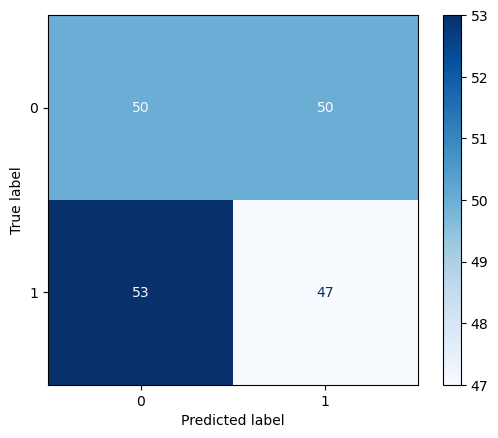

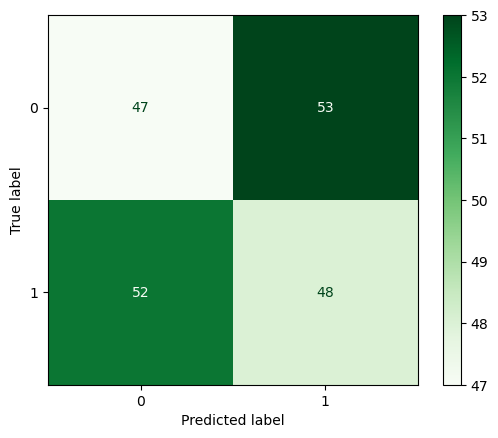

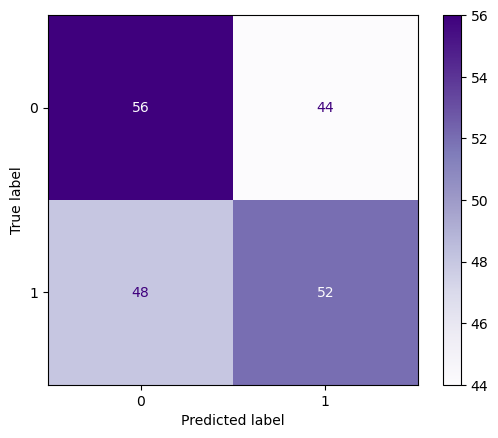

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

# Predict on test data
log_preds =log_model.predict(x_test)
tree_preds = tree_model.predict(x_test)
forest_preds = forest_model.predict(x_test)

# Accuracy Scores
log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)
forest_acc = accuracy_score(y_test, forest_preds)

# Print Accuracies
print(" Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100:.2f}%")
print(f"Decision Tree Accuracy: {tree_acc*100:.2f}%")
print(f"Random Forest Accuracy: {forest_acc*100:.2f}%")

#  Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, log_preds)
print("\n Confusion Matrix - Logistic Regression:\n", cm_log)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1]).plot(cmap='Blues')

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, tree_preds)
print("\n Confusion Matrix - Decision Tree:\n", cm_tree)
ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1]).plot(cmap='Greens')

#  Confusion Matrix for Random Forest
cm_forest = confusion_matrix(y_test, forest_preds)
print("\n Confusion Matrix - Random Forest:\n", cm_forest)
ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=[0, 1]).plot(cmap='Purples')




In [25]:
import pickle as pkl


In [26]:
pkl.dump(forest_model,open("OnlineLearningDropoutPrediction.pkl","wb"))